Global Fitting: Tutorial 1

In this tutorial, we will look at one of the simplest examples in of global fitting of the transient data. We will look at a molecule which will only decay via fluorescence after being excited.

$ E \xrightarrow[]{k_{fl}} GS + h \nu$

When in its ground state, the first traisition (HOMO - LUMO) is excited by 650 nm photons. The lowest energy transition for the excited molecule is at 400 nm. 

Lets begin by plotting the ideal absorption spectra of these two molecules. 

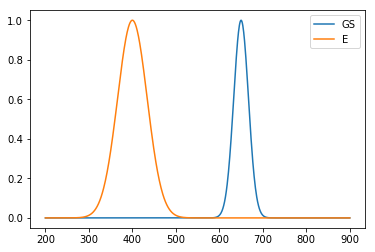

In [87]:
import numpy as np
import matplotlib.pyplot as plt

Wavelength_Range = np.linspace(200,900,701)

# The simple way to define a gaussian is: a*e^{-((x-b)/c)**2}. In the form below, I am expressing it in terms
# of the full-width half maximum instead of 'c'.

Gaussian = lambda x,center,fwhm,amplitude : amplitude * np.exp(-4*np.log(2)*(x-center)**2/(fwhm**2))

# I will give both spectrums an equal amplitude of 1, but I will make the excited spectrum a bit
# broader by increasing its fwhm.

Spectrum_GS = Gaussian(Wavelength_Range, 650,40,1)

Spectrum_E = Gaussian(Wavelength_Range, 400,80,1)

plt.plot(Wavelength_Range,Spectrum_GS,label='GS')
plt.plot(Wavelength_Range,Spectrum_E,label='E')
plt.legend()

In the transient experiment we are collecting a 'difference spectrum' at each delay time. This difference spectrum is generated by subtracting the 'unpumped' absorption spectrum from the 'pumped' absortion spectrum. 

In practice, the difference between the pumped and un-pumped absorption is small, because only a small percentage of the molecules become excited.

If the pump excites 10% of the molecules, then the raw pumped and un-pumped absorption spectra will look the following way:

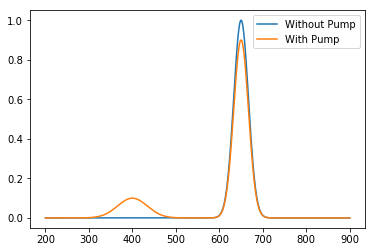

In [88]:
Spectrum_NoPump = Spectrum_GS
Spectrum_Pump = 0.9*Spectrum_GS + 0.1*Spectrum_E

plt.plot(Wavelength_Range,Spectrum_NoPump,label='Without Pump')
plt.plot(Wavelength_Range,Spectrum_Pump,label='With Pump')
plt.legend()

The difference spectrum is calculated as the difference between the spectra.

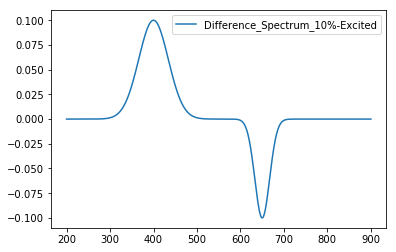

In [89]:
Difference_Spectrum = Spectrum_Pump-Spectrum_NoPump
plt.plot(Wavelength_Range,Difference_Spectrum,label='Difference_Spectrum_10%-Excited')
plt.legend()


If you look back at how the difference spectrum is calculated, you can check that it may be simplified to:

$\omega_{Diff} = C_{E} * (\omega_{E} - \omega_{GS} )$

The spectrum $SAS_E =(\omega_{E} - \omega_{GS} )$ is thus called the 'Species Associated Spectrum' (SAS) of the excited species 'E'.

Similarily, the SAS of the GS is $SAS_{GS} = (\omega_{GS} - \omega_{GS}) = 0$

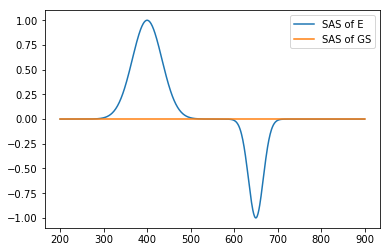

In [90]:
# Plot of the species assoiated spectra

SAS_E = Spectrum_E - Spectrum_GS
SAS_GS = Spectrum_GS - Spectrum_GS

plt.plot(Wavelength_Range,SAS_E,label='SAS of E')
plt.plot(Wavelength_Range,SAS_GS,label='SAS of GS')
plt.legend()

When we collect a spectrum, the total spectrum contains the species associated spectra of each of the species present in the solution at that particular time. The amount of contribution, or weight, of a specific SAS depends on the concentration of its associated species at that given time.

In this tutorial we will model the following: At $ t = t_0$, the excited state population of E is immediatelly created*. Any solvent relaxation, geometric rearrangement, or vibrational cooling is neglected. The only pathways for the decay of E is via fluorescence.  

$\frac{dC_{E}}{dt} = -k_{fl}C_{E}$


$C_{E}(t) = C_{E}(0) \ e^{-k_{fl}t} = C_{E}(0) \ e^{-t/\tau_{fl}}$


Where $\tau_{fl} = 1/k_{fl}$ is the fluorescence lifetime.

Since the SAS of E is the only non-zero spectrum present, our transient spectrum at any given time can be expressed as:

$Transient \ Spectrum = C_{E}(t) \times \ SAS_E$

*This is never true, because pulses have a finite width. Sometimes it is O.K. to make this approximation, but often it isn't... The rise of the population is part of what is modelled by the 'instrument response function' (IRF), but we won't discuss that in this tutorial.


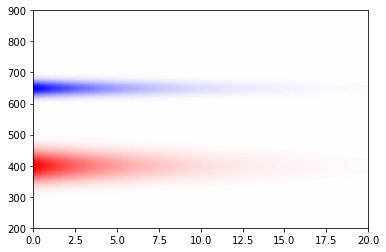

In [91]:
# Lets define the function CE(t)

CEt = lambda tau,CE0,t : CE0*np.exp(-t/tau)

# Lets define t to go from 0 to 20 ns...

t = np.linspace(0,20,100)

# Now lets let CE0 = 1, assign a fluorescence lifetime of 10 ns to our excited state, and create the CEt vector...

CEt_vector = CEt(5,1,t)

TS = np.outer(SAS_E,CEt_vector)

plt.pcolormesh(t,Wavelength_Range,TS,cmap='bwr')


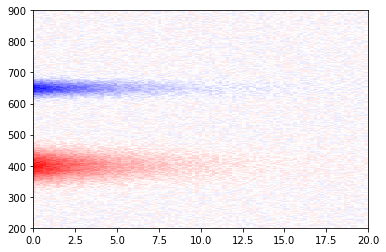

In [92]:
# Ral data is never so perfect.. So let's add some noise!
noise = (np.random.rand(*TS.shape)-0.5)/5
TS += noise
plt.pcolormesh(t,Wavelength_Range,TS,cmap='bwr')


When processing your data, this transient data matrix is yout starting point (after you load your data). Of course, in the real analysis, we do not know neither the spectra, the kinetic constants, nor the kinetic model a-priori! The goal is to obtain the species associated spectra and kinetics by fitting a reasonable model to the data. We will now work backwards and obtain the model from this data.

Text(0.5, 1.0, '400.0 nm')

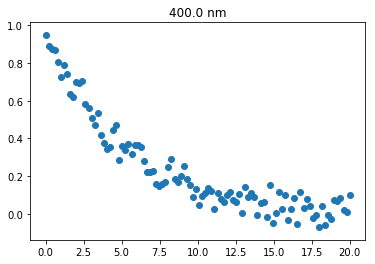

In [95]:
# Let's now plot the noisy decay trace of the excited state absorption band at 400 nm
plt.scatter(t,TS[200,:])
plt.title("%s nm" % Wavelength_Range[200])